In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('case_cost_prediction_train.csv')
val = pd.read_csv('case_cost_prediction_val.csv')

# Data Understanding

In [70]:
df.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


In [71]:
val.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,km,ko,kp,kt,ku,s,sa,sb,sc,sd
0,1,2020-02-01 00:00:00,257,40,305959,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2014-08-01 00:00:00,228,30,214545,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2,3,2014-03-01 00:00:00,345,30,95774,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2017-05-01 00:00:00,6,30,194254,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2015-09-01 00:00:00,119,40,1231866,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

In [72]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24633 entries, 0 to 24632
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   row_id        24633 non-null  int64 
 1   tglpelayanan  24633 non-null  object
 2   kddati2       24633 non-null  int64 
 3   tkp           24633 non-null  int64 
 4   peserta       24633 non-null  int64 
 5   a             24633 non-null  int64 
 6   b             24633 non-null  int64 
 7   c             24633 non-null  int64 
 8   cb            24633 non-null  int64 
 9   d             24633 non-null  int64 
 10  ds            24633 non-null  int64 
 11  gd            24633 non-null  int64 
 12  hd            24633 non-null  int64 
 13  i1            24633 non-null  int64 
 14  i2            24633 non-null  int64 
 15  i3            24633 non-null  int64 
 16  i4            24633 non-null  int64 
 17  kb            24633 non-null  int64 
 18  kc            24633 non-null  int64 
 19  kg  

In [7]:
col = df.columns

In [8]:
col = col[2:35]
col

Index(['kddati2', 'tkp', 'peserta', 'a', 'b', 'c', 'cb', 'd', 'ds', 'gd', 'hd',
       'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg', 'ki', 'kj', 'kk', 'kl', 'km',
       'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb', 'sc', 'sd', 'case'],
      dtype='object')

In [9]:
df.shape

(57971, 36)

In [10]:
for i in col:
    print(i)
    print(df[i].value_counts())
    print('\n')

kddati2
264    140
113    138
296    136
407    136
227    135
      ... 
517     23
459     10
518     10
527      7
479      2
Name: kddati2, Length: 490, dtype: int64


tkp
30    29043
40    28928
Name: tkp, dtype: int64


peserta
141656     6
100458     6
145966     6
213389     6
137739     6
          ..
1056289    1
527277     1
41414      1
713481     1
509495     1
Name: peserta, Length: 36517, dtype: int64


a
0    55692
1     2150
2      129
Name: a, dtype: int64


b
0    38787
1    17061
2     1499
3      393
5      113
7       51
6       33
4       26
8        8
Name: b, dtype: int64


c
1    33598
0    18922
2     4751
4      395
3      252
6       32
5       21
Name: c, dtype: int64


cb
0    57949
1       22
Name: cb, dtype: int64


d
0    44709
1    11126
2     1505
3      431
5      102
4       98
Name: d, dtype: int64


ds
0    57971
Name: ds, dtype: int64


gd
0     56185
1      1352
2       223
3       103
4        47
5        22
6        17
7        13
8         7

In [73]:
df.shape

(57971, 36)

In [74]:
df.duplicated().sum()

0

# Baseline

## Data Cleansing

In [11]:
df.isna().sum()

row_id          0
tglpelayanan    0
kddati2         0
tkp             0
peserta         0
a               0
b               0
c               0
cb              0
d               0
ds              0
gd              0
hd              0
i1              0
i2              0
i3              0
i4              0
kb              0
kc              0
kg              0
ki              0
kj              0
kk              0
kl              0
km              0
ko              0
kp              0
kt              0
ku              0
s               0
sa              0
sb              0
sc              0
sd              0
case            0
unit_cost       0
dtype: int64

In [12]:
#we will drop row_id and tgl_pelayanan
df = df.drop(['row_id','tglpelayanan','case'], axis=1)

## Multiple Linear Regression

In [13]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [14]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = df.drop('unit_cost', axis=1)
y = df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np

#train model
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

multi_reg.fit(X_train, y_train)


# rf = RandomForestRegressor(random_state=0)
# rf.fit(X_train, y_train)

y_pred = multi_reg.predict(X_test)

accuracies = {}

accuracy = multi_reg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Mulitple Linear Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
# Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

print(color.BOLD + "\nAccuracy of Multiple Linear Regression is ", accuracy_rounded,'%')


R2 score is  0.8962316610646258

Mean Absolute Error is 386089.12

Mean Squared Error is 368829594049.93

Root Mean Squared Error is 607313.42

Accuracy of Multiple Linear Regression is  89.62 %


## Ridge Regression

In [16]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = df.drop('unit_cost', axis=1)
y = df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
#Ridge regression library
from sklearn.linear_model import Ridge

# define the model
ridge_reg = Ridge(random_state=42)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

accuracy = ridge_reg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Ridge Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
# Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

print(color.BOLD + "\nAccuracy of Ridge Regression is ", accuracy_rounded,'%')


R2 score is  0.8962171968261347

Mean Absolute Error is 386041.17

Mean Squared Error is 368881005099.45

Root Mean Squared Error is 607355.75

Accuracy of Ridge Regression is  89.62 %


## Lasso

In [18]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = df.drop('unit_cost', axis=1)
y = df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
#Lasso Library
from sklearn.linear_model import Lasso
# define the model
lasso_reg = Lasso(random_state=42)

lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

accuracy = lasso_reg.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Lasso Regression'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)
# Adj_r2 = 1-(1-r2)*(9-1)/(9-1-1)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

print(color.BOLD + "\nAccuracy of Lasso Regressor is ", accuracy_rounded,'%')


R2 score is  0.896230875360505

Mean Absolute Error is 386088.21

Mean Squared Error is 368832386721.91

Root Mean Squared Error is 607315.72

Accuracy of Lasso Regressor is  89.62 %


## Decission Tree

In [20]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = df.drop('unit_cost', axis=1)
y = df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Decission Tree'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

print(color.BOLD + "\nAccuracy of Decission Tree Regressor is ", accuracy_rounded,'%')


R2 score is  0.9791800908951597

Mean Absolute Error is 121199.76

Mean Squared Error is 74001364019.88

Root Mean Squared Error is 272031.92

Accuracy of Decission Tree Regressor is  97.92 %


# Random Forest

In [22]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = df.drop('unit_cost', axis=1)
y = df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = rf.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Random Forest Regressor'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

print(color.BOLD + "\nAccuracy of Random Forest Regressor is ", accuracy_rounded,'%')


R2 score is  0.9852127642586729

Mean Absolute Error is 104803.12

Mean Squared Error is 52559096652.7

Root Mean Squared Error is 229257.71

Accuracy of Random Forest Regressor is  98.52 %


## Light GBM

In [65]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = df.drop('unit_cost', axis=1)
y = df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [67]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

accuracy = lgbm.score(X_test, y_test)
accuracy_rounded = round(accuracy*100,2)
accuracies['Random Forest Regressor'] = accuracy_rounded

r2 = metrics.r2_score(y_test, y_pred)

print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

print(color.BOLD + "\nAccuracy of Random Forest Regressor is ", accuracy_rounded,'%')


R2 score is  0.9762737061696386

Mean Absolute Error is 160387.71

Mean Squared Error is 80095509498.89

Root Mean Squared Error is 283011.5

Accuracy of Random Forest Regressor is  97.63 %


we've got best result with Random Forest and Decission tree and LGBM

# Try Increasment with Deep Cleansing And Tunning Hyperparam

## Data Cleansing

<AxesSubplot:>

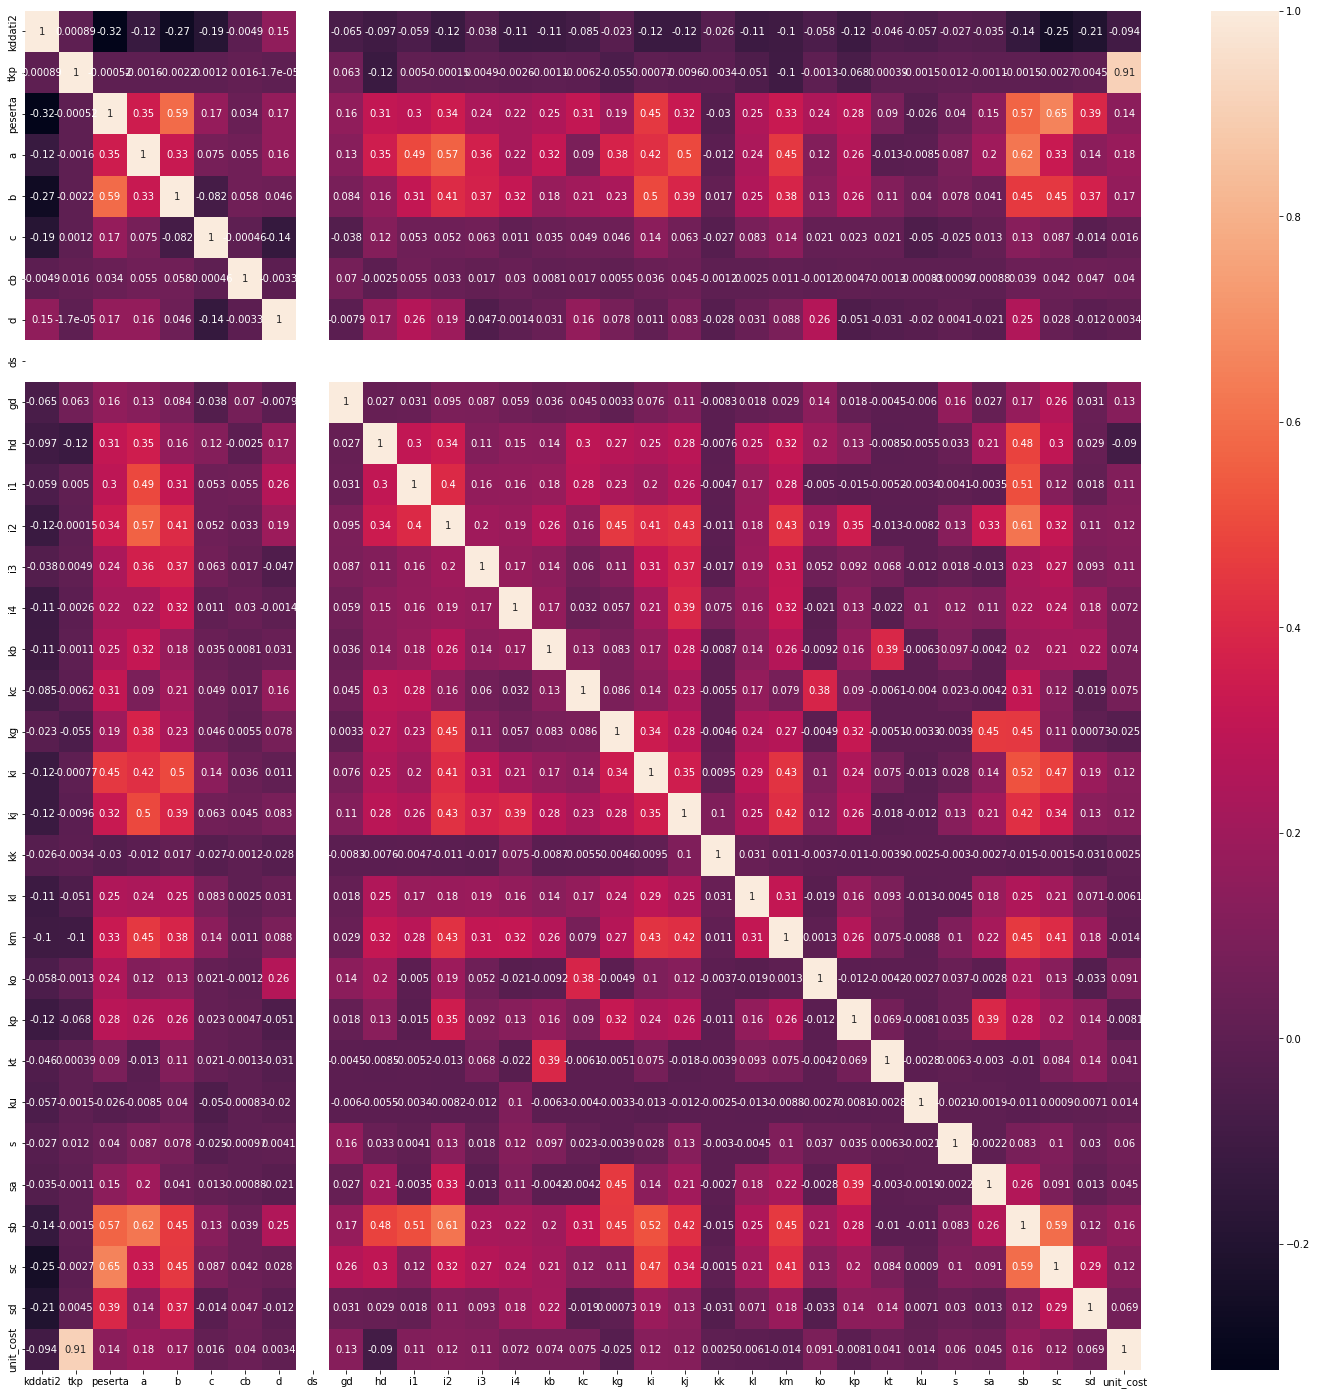

In [24]:
korelasi = df.corr()
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)
sns.heatmap(korelasi, annot=True)

we will drop ds on next step because has one value

<AxesSubplot:xlabel='unit_cost'>

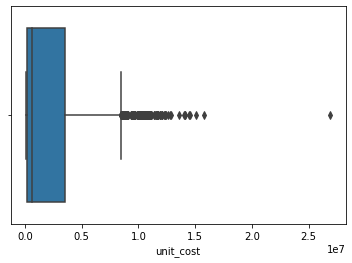

In [25]:
sns.boxplot(x=df['unit_cost'])

In [26]:
#iterate to get value from index
vals = []
for i in df.columns:
    vals.append(str(i))

In [27]:
vals

['kddati2',
 'tkp',
 'peserta',
 'a',
 'b',
 'c',
 'cb',
 'd',
 'ds',
 'gd',
 'hd',
 'i1',
 'i2',
 'i3',
 'i4',
 'kb',
 'kc',
 'kg',
 'ki',
 'kj',
 'kk',
 'kl',
 'km',
 'ko',
 'kp',
 'kt',
 'ku',
 's',
 'sa',
 'sb',
 'sc',
 'sd',
 'unit_cost']

In [28]:
df.head()

,kddati2,tkp,peserta,a,b,c,cb,d,ds,gd,...,ko,kp,kt,ku,s,sa,sb,sc,sd,unit_cost
0,332,40,179530,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.597440e+06
1,54,40,104782,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,4.951008e+06
2,323,30,280645,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.984208e+05
3,318,40,178685,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.008756e+06
4,150,30,1199321,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,5,3.072272e+05


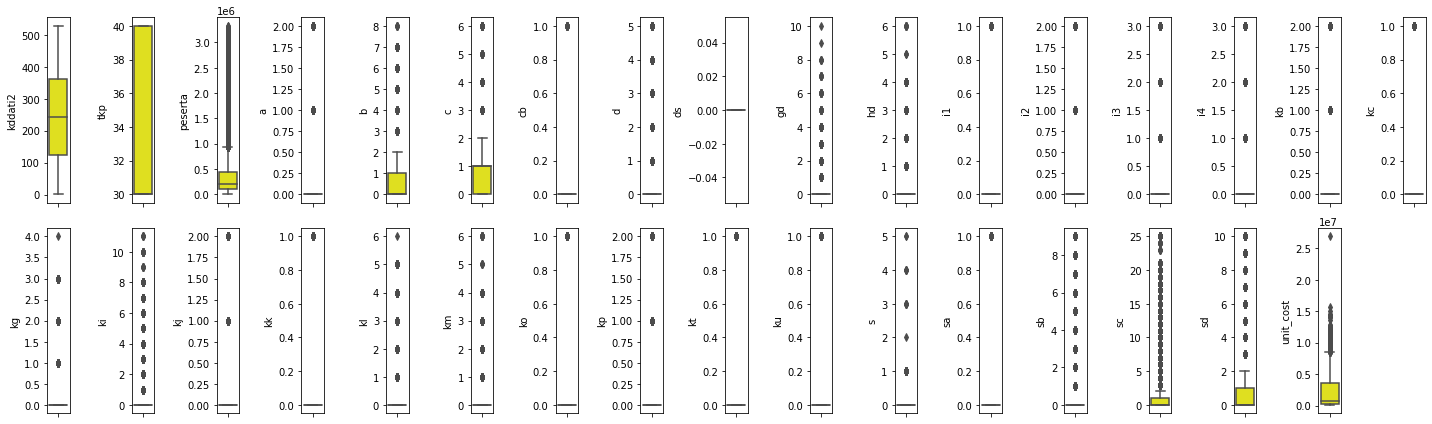

In [29]:
# adjust the figure size for better readability
plt.figure(figsize=(20,6))
# plotting
features = vals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.boxplot(y=df[features[i]], color='yellow')
    plt.tight_layout()


In [30]:
#drop ds and peserta 
df = df.drop(['peserta','ds'], axis=1)

In [31]:
#iterate to get value from index
vals = []
for i in df.columns:
    vals.append(str(i))

In [32]:
#drop outlier
def cap_data(df):
    for col in vals:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  kddati2


C:\Users\yodia\AppData\Local\Temp\ipykernel_8980\914673873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\yodia\AppData\Local\Temp\ipykernel_8980\914673873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  tkp
capping the  a
capping the  b
capping the  c
capping the  cb
capping the  d
capping the  gd
capping the  hd
capping the  i1
capping the  i2
capping the  i3
capping the  i4
capping the  kb
capping the  kc
capping the  kg
capping the  ki
capping the  kj
capping the  kk
capping the  kl
capping the  km
capping the  ko
capping the  kp
capping the  kt
capping the  ku
capping the  s
capping the  sa
capping the  sb
capping the  sc
capping the  sd
capping the  unit_cost


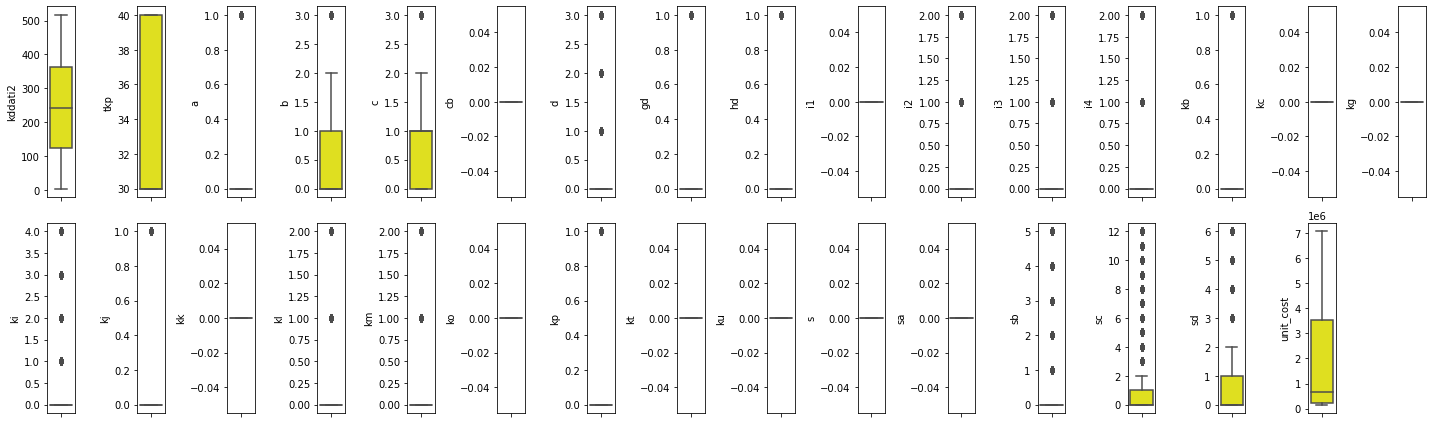

In [33]:
# adjust the figure size for better readability
plt.figure(figsize=(20,6))
# plotting
features = vals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.boxplot(y=final_df[features[i]], color='yellow')
    plt.tight_layout()


we will drop column ds (only one value), case(in test data case isn't matches) and sb (high correlation with l2)

In [34]:
df.head()

,kddati2,tkp,a,b,c,cb,d,gd,hd,i1,...,ko,kp,kt,ku,s,sa,sb,sc,sd,unit_cost
0,332,40,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.597440e+06
1,54,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.951008e+06
2,323,30,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.984208e+05
3,318,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.008756e+06
4,150,30,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,5,3.072272e+05


# Tunning Hyperparameter


we will tunning hyperparameter on Decission Tree and Random Forest because r2 score is highest than other

## Decission Tree Regressor

In [35]:
#split dataset into train and test
# split train test
from sklearn.model_selection import train_test_split

X = final_df.drop('unit_cost', axis=1)
y = final_df['unit_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [38]:
from sklearn.tree import DecisionTreeRegressor

# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,3,5,7,9,11,13,15],
              "min_samples_leaf":  [3,5,7,9,11,13,15],
              "min_samples_split" : [3,5,7,9,11,13,15]}

# Instantiate a Decision Tree classifier: tree
dt = DecisionTreeRegressor()

# Instantiate the RandomizedSearchCV object: 

dt_random = GridSearchCV(estimator = dt, 
                               param_grid = param_dist, 
                               cv = 3, 
                               verbose=0, 
                               n_jobs = -1)

# Fit it to the data
dt_random.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_random.best_params_))
print("Best score is {}".format(dt_random.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best score is 0.9770423093903146


In [ ]:
dt = DecisionTreeRegressor(max_depth= 19, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
dt.fit(X_train,y_train)

In [39]:
#Predict on test data
y_pred = dt_random.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)


#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))



R2 score is  0.98

Mean Absolute Error is 151481.36

Mean Squared Error is 81337452637.61

Root Mean Squared Error is 285197.22


## Random Forest Regressor

In [40]:
#Randomized Search CV

# # Number of trees in the random forest
# n_estimators = [int(x) for x in np.linspace(start = 5, stop = 300, num = 6)]

# # Number of features to consider at every split
# max_features = ['sqrt', 'log2']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 13, 16]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4, 8]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': [100, 300,500],
    'max_depth': [5, 10, 15, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]    
}


print(random_grid)

{'n_estimators': [100, 300, 500], 'max_depth': [5, 10, 15, None], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4]}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 9, 
                               cv = 4, 
                               verbose=0,
                               random_state=42, 
                               n_jobs = -1)

In [42]:
rf_random.fit(X_train, y_train)

C:\Users\yodia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
                   n_iter=9, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42)

In [43]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [44]:
#Predict on test data
y_pred = rf_random.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)


#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,rf_random.predict(X_test)),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,rf_random.predict(X_test))),2))


R2 score is  0.98

Mean Absolute Error is 130297.27

Mean Squared Error is 64151823486.78

Root Mean Squared Error is 253282.1


## Multiple Linear Regression Tunning Hyperparameter

In [45]:
#split feature and target data
X = final_df.drop('unit_cost', axis=1)
y = final_df['unit_cost']

#define var of split result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [46]:
# Define a range of alpha values to explore
alphas = [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20]

# Initialize a list to store the validation RMSE for each alpha value
val_rmse = []

# Train and evaluate the model for each alpha value
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_test)
    val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))

# Select the best alpha value
best_alpha = alphas[np.argmin(val_rmse)]

# Train a final model using the best alpha value
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

Ridge(alpha=1e-06)

In [47]:
#Predict on test data
y_pred = final_model.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)


#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))


R2 score is  0.91

Mean Absolute Error is 377466.75

Mean Squared Error is 320483644340.29

Root Mean Squared Error is 566112.75


In [ ]:
X_train.shape

## LightGBM

In [58]:
#split feature and target data
X = final_df.drop('unit_cost', axis=1)
y = final_df['unit_cost']

#define var of split result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200,300,500],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [31, 63, 127]
}

lgbm = LGBMRegressor()

gc_lgbm = GridSearchCV(lgbm, param_grid, cv=5, scoring='neg_mean_squared_error')
gc_lgbm.fit(X_train, y_train)

best_params = grid_search.best_params_

In [62]:
best_params

{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 127}

In [63]:
#Predict on test data
y_pred = gc_lgbm.predict(X_test)

#Metrics Calculation
r2 = round(metrics.r2_score(y_test, y_pred),2)


#Display results
print(color.BOLD + '\nR2 score is ',r2)

print(color.BOLD + '\nMean Absolute Error is',round(metrics.mean_absolute_error(y_test,y_pred),2))

print(color.BOLD + '\nMean Squared Error is',round(metrics.mean_squared_error(y_test,y_pred),2))

print(color.BOLD + '\nRoot Mean Squared Error is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))


R2 score is  0.98

Mean Absolute Error is 134763.76

Mean Squared Error is 65934519771.61

Root Mean Squared Error is 256777.18


as we can see, lgbm after tunning hyperparameter has increasment for thr rmse, than dt, and rf which after tunning hyperparmeter has reduction (overfitting)

In [64]:
#Exporting the model using joblib library
import joblib
joblib.dump(gc_lgbm,"BPJS_CostPrediction.pkl")

['BPJS_CostPrediction.pkl']